# 3-Time Series-Ürün Talep Tahmini ve Stok Yönetimi

Talep Tahmini, geçmiş verilere ve ilgili faktörlere dayanarak bir ürün veya hizmet için gelecekteki müşteri talebini tahmin etmek anlamına gelir.
Stok Yönetimi, maliyetleri minimize ederken müşteri talebini karşılamak amacıyla envanter seviyelerinin stratejik olarak yönetilmesini ifade eder. Bu süreç, doğru miktarda ürünün doğru zamanda mevcut olmasını sağlamak için envanterin alım, saklama, dağıtım ve tüketimini optimize etmeyi içerir. Stok yönetimi, geçmiş verilere ve ilgili faktörlere dayanarak gelecekteki talebi tahmin ederek ve bu tahminlere dayanarak envanteri etkili bir şekilde planlayarak gerçekleştirilir.

<img src="talep.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date

# Veri İnceleme

In [2]:
df=pd.read_csv("talepstok.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Product_ID,Demand,Inventory
0,0,2023-06-01,P1,51,5500
1,1,2023-06-02,P1,141,5449
2,2,2023-06-03,P1,172,5308
3,3,2023-06-04,P1,91,5136
4,4,2023-06-05,P1,198,5045


In [4]:
# Unnamed sutununa ihtiyaç olmadığını görebiliyoruz.
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.tail()

,Date,Product_ID,Demand,Inventory
57,2023-07-28,P1,174,0
58,2023-07-29,P1,72,0
59,2023-07-30,P1,52,0
60,2023-07-31,P1,188,0
61,2023-08-01,P1,102,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        62 non-null     object
 1   Product_ID  62 non-null     object
 2   Demand      62 non-null     int64 
 3   Inventory   62 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


In [8]:
# Tarih sütununu datetime veri tipine dönüştürün
# df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Veri Grafikleri

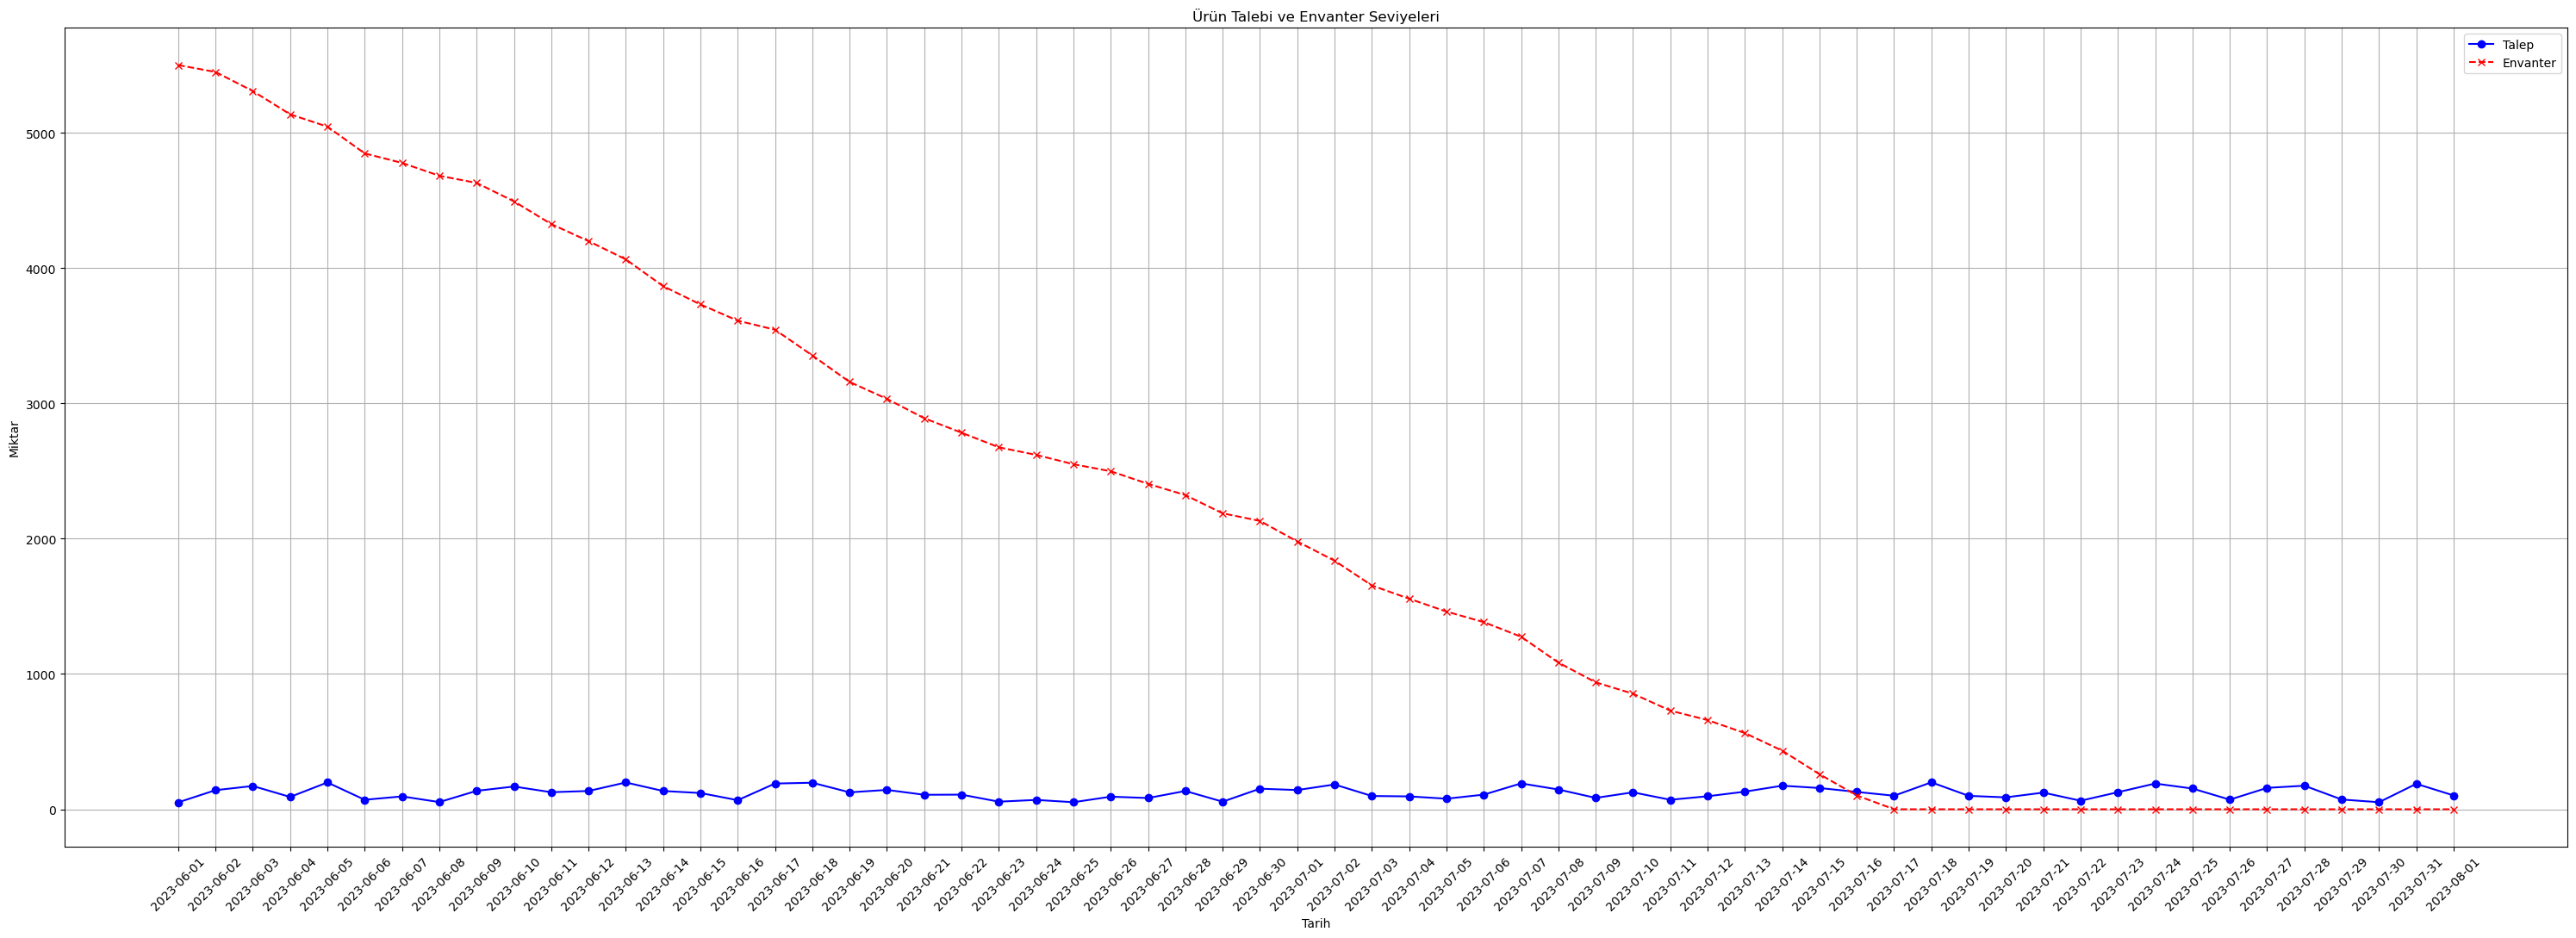

In [18]:
# Çizgi grafiği oluşturun
plt.figure(figsize=(30, 11))
plt.plot(df["Date"], df["Demand"], marker='o', label='Talep', linestyle='-', color='b')
plt.plot(df["Date"], df["Inventory"], marker='x', label='Envanter', linestyle='--', color='r')

# Grafik başlığı ve etiketleri ayarlayın
plt.title('Ürün Talebi ve Envanter Seviyeleri')
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.xticks(rotation=45)  # Tarih etiketlerini 45 derece döndür

# Eksenleri ayarlayın
plt.grid(True)
plt.legend()

# Grafiği göster
plt.tight_layout()
plt.show()

In [21]:
# Talep için:
fig_demand = px.line(df, x='Date',
                     y='Demand',
                     title='Tarihe Göre Talep')
fig_demand.show()

In [23]:
# Stok için:
fig_inventory = px.line(df, x='Date',
                        y='Inventory',
                        title='Tarihlere göre Stok')
fig_inventory.show()

In [28]:
import plotly.graph_objects as go
# Talep ve Stok için aynı grafikte iki çizgi oluşturun
fig = px.line(df, x='Date', title='Tarihlere Göre Talep ve Stok')
fig.add_trace(go.Scatter(x=df['Date'], y=df['Demand'], mode='lines', name='Talep'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Inventory'], mode='lines', name='Stok'))

# Grafikleri göster
fig.show()

# Modele Hazırlama

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



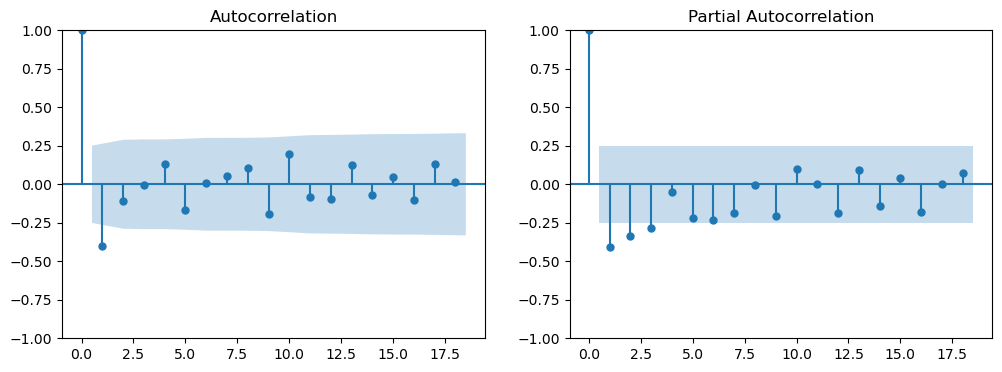

In [35]:
# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(differenced_series, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [37]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Demand'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

C:\Users\LENOVO\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning:

Appropriate D value may not have been reached; length of seasonally-differenced array (10) is shorter than m (52). Using D=1

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmod

(1, 0, 2)


In [ ]:
 # çıktısı (p=1, d=0, q=2)

# Modelleme

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   62
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -321.071
Date:                Sat, 16 Sep 2023   AIC                            652.143
Time:                        17:39:29   BIC                            662.779
Sample:                             0   HQIC                           656.319
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.0670      1.735     69.211      0.000     116.667     123.467
ar.L1          0.8043      0.170      4.720      0.000       0.470       1.138
ma.L1         -0.8439     26.674     -0.032      0.9

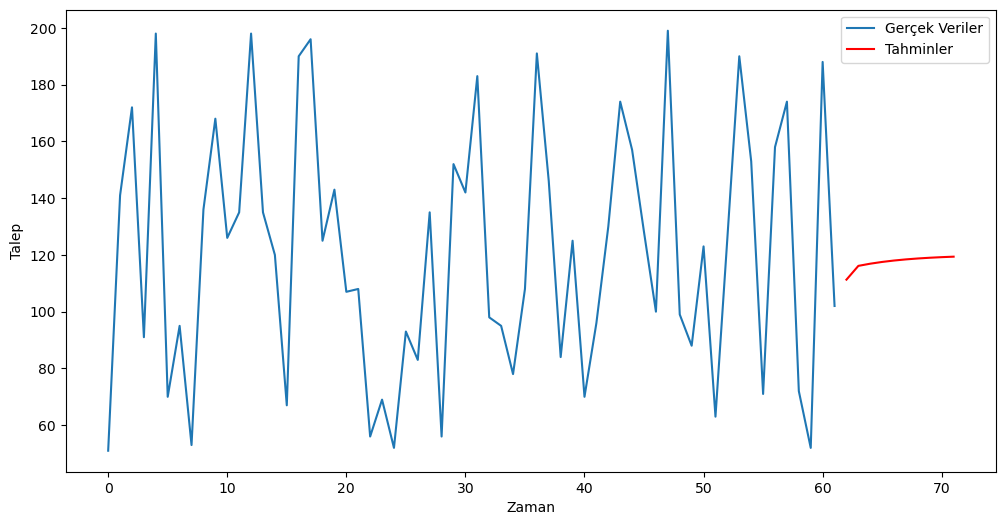

In [46]:
import statsmodels.api as sm

# ARIMA modeli için p, d, q değerlerini ayarlayın
p, d, q = 1, 0, 2

# ARIMA modelini oluşturun ve uyum sağlayın
model = sm.tsa.ARIMA(df["Demand"], order=(p, d, q))
fitted = model.fit()

# Model özetini görüntüle
print(fitted.summary())

# Tahminleri yapın
# Tahminleri yapın
forecast_steps = 10  # Gelecekteki kaç adım tahmin yapmak istediğinizi ayarlayın
forecast = fitted.forecast(steps=forecast_steps)

# Tahminleri ve gerçek verileri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(df["Demand"], label="Gerçek Veriler")
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label="Tahminler", color='red')
plt.xlabel("Zaman")
plt.ylabel("Talep")
plt.legend()
plt.show()

Bu çıktı, SARIMAX modelinizin sonuçlarını ve modelin kalitesini değerlendirmek için kullanabileceğiniz istatistiksel bilgileri içeriyor. İşte bu çıktıdaki bazı önemli bölümlerin açıklamaları:

1. **Model Bilgileri:**
   - `Dep. Variable`: Modelin tahmin etmeye çalıştığı bağımlı değişkenin adı (Demand - Talep).
   - `No. Observations`: Gözlem sayısı, veri kümenizdeki toplam gözlem sayısı (62).
   - `Model`: Kullanılan modelin açıklaması (ARIMA(1, 0, 2)).
   - `Log Likelihood`: Modelin maksimum olabilirlik tahminini gösteren log olabilirlik değeri.
   - `Date`: Analizin yapıldığı tarih ve saat.
   - `AIC`, `BIC`, `HQIC`: Bilgi kriterleri; düşük değerler, modelin kalitesini gösterir.
   - `Sample`: Veri setinin hangi gözlemleri kullanıldığını belirtir.

2. **Katsayılar (Coefficients):**
   - `const`: Sabit terim (intercept), modeldeki sabit bileşen.
   - `ar.L1`, `ma.L1`, `ma.L2`: Modelin otoregresif (AR) ve hareketli ortalama (MA) terimlerinin katsayıları.
   - `sigma2`: Hata teriminin varyansı.

3. **İstatistiksel Testler:**
   - `Ljung-Box (L1) (Q)`: Otokorelasyon testi sonucu, modelin otokorelasyonu değerlendirir.
   - `Jarque-Bera (JB)`: Normal dağılım varsayımını test eden bir test sonucu.
   - `Prob(Q)`, `Prob(JB)`: İlgili testlerin p-değerleri. Düşük p-değerleri, anlamlı sonuçları gösterir.
   - `Heteroskedasticity (H)`: Heteroskedastisite test sonucu, hata varyansının değişip değişmediğini değerlendirir.
   - `Prob(H) (two-sided)`: Heteroskedastisite testinin iki taraflı p-değeri.
   - `Skew`: Verinin çarpıklık (skewness) ölçüsü.
   - `Kurtosis`: Verinin basıklık (kurtosis) ölçüsü.

Bu çıktı, modelinizin belirli bir ARIMA yapılandırması (ARIMA(1, 0, 2)) için tahminlerini ve modelin kalitesini değerlendirmek için kullanabileceğiniz bir dizi istatistik sunmaktadır. Özellikle, AIC ve BIC gibi bilgi kriterleri, modelin kalitesini değerlendirmek için önemlidir. Ayrıca, Ljung-Box ve Jarque-Bera testleri gibi istatistiksel testler, modelinizin uyarlamasının kalitesini değerlendirmenize yardımcı olabilir. Bu çıktı, modelinizi gözden geçirirken ve iyileştirirken kullanabileceğiniz önemli bir kaynaktır.

In [47]:
# Tahmin:
predictions = fitted.predict(len(df), len(df)+10)
print(predictions)

62    111.282884
63    116.139225
64    116.907717
65    117.525851
66    118.023045
67    118.422960
68    118.744631
69    119.003366
70    119.211478
71    119.378873
72    119.513516
Name: predicted_mean, dtype: float64


In [63]:
# Öncelikle DataFrame'inizin son tarihini bulun
last_date = df['Date'].max()

# Kaç gün ileri tahmin yapmak istediğinizi belirtin
forecast_steps = 10

# Gelecekteki tarihleri oluşturun
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, forecast_steps + 1)]

# Talep ve envanter tahminlerinizi yapın (bu kodu uygun şekilde güncelleyin)
def forecast_demand(date):
    # Burada gerçek bir tahmin fonksiyonu veya modeli kullanmalısınız
    # Örneğin, basit bir rastgele tahmin yapalım:
    return np.random.randint(100, 200)

def forecast_inventory(date):
    # Burada gerçek bir tahmin fonksiyonu veya modeli kullanmalısınız
    # Örneğin, basit bir rastgele tahmin yapalım:
    return np.random.randint(3000, 5000)

# Gelecekteki tahminleri yapın
forecasted_demand = [forecast_demand(date) for date in future_dates]
forecasted_inventory = [forecast_inventory(date) for date in future_dates]

# Gelecekteki tahminleri bir DataFrame'e dönüştürün
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Demand': forecasted_demand,
    'Forecasted_Inventory': forecasted_inventory
})

# Sonuçları yazdırın veya başka bir işlem yapın
print(forecast_df)

        Date  Forecasted_Demand  Forecasted_Inventory
0 2023-08-02                120                  3078
1 2023-08-03                157                  4284
2 2023-08-04                177                  3430
3 2023-08-05                113                  4821
4 2023-08-06                137                  3326
5 2023-08-07                126                  3223
6 2023-08-08                191                  4953
7 2023-08-09                120                  3976
8 2023-08-10                113                  4360
9 2023-08-11                190                  3160


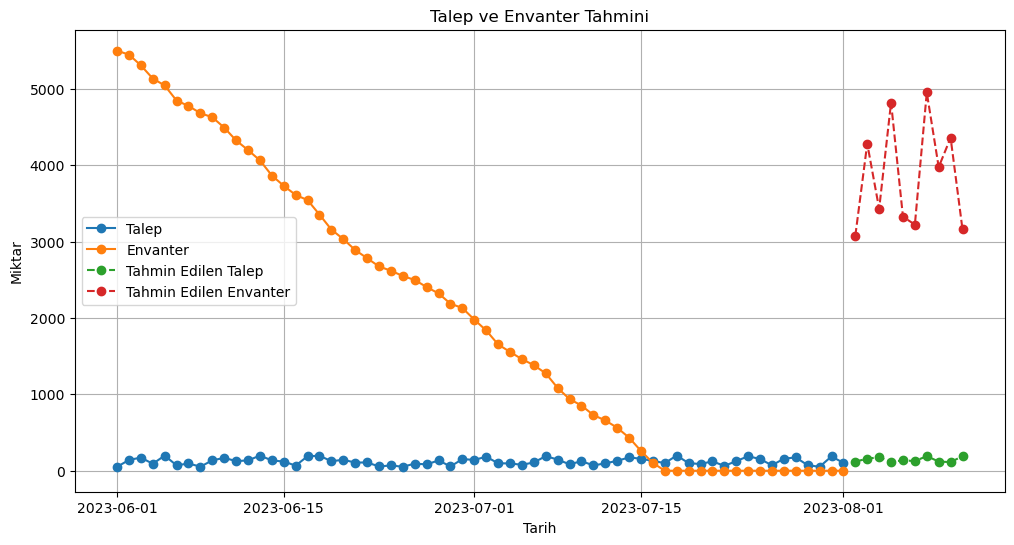

In [64]:
# Veriyi çiz
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Demand'], label='Talep', marker='o')
plt.plot(df['Date'], df['Inventory'], label='Envanter', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Demand'], label='Tahmin Edilen Talep', linestyle='--', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Inventory'], label='Tahmin Edilen Envanter', linestyle='--', marker='o')

plt.title('Talep ve Envanter Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.legend()
plt.grid(True)
plt.show()

### Sonuç Olarak:
Zamana bağlı Talep ve Stok Yönetimi Projesi, işletmelerin talep ve stok yönetimini iyileştirerek daha etkili, verimli ve karlı hale gelmelerini amaçlar.

Bu proje, doğru tahminler yapabilmek için çeşitli analiz ve modelleme tekniklerinden ARIMA kullanıldı. Bu tahminler, işletmelerin envanterlerini verimli bir şekilde yönetmelerine ve talep karşılamada daha etkili olmalarına yardımcı olabilir. Ayrıca, envanter maliyetlerini azaltarak ve müşteri hizmet seviyelerini artırarak işletme karlılığını artırabilir.

### Prophet ile Tahmin:

In [65]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Prophet için uygun sütun adlarını kullanarak veri çerçevesini yeniden adlandırın
forecast_data = df.rename(columns={"Date": "ds", "Demand": "y"})

# Prophet modelini oluşturun ve eğitin
model = Prophet()
model.fit(forecast_data)

# Gelecekteki dönemleri oluşturun (örneğin, 365 gün sonrasını tahmin etmek için)
future = model.make_future_dataframe(periods=365)

# Tahminleri yapın
forecast = model.predict(future)

# Tahminleri çizdirin
fig = plot_plotly(model, forecast)
fig.show()

# Bileşenleri çizdirin (trend, haftalık, yıllık)
fig2 = plot_components_plotly(model, forecast)
fig2.show()

18:12:19 - cmdstanpy - INFO - Chain [1] start processing
18:12:19 - cmdstanpy - INFO - Chain [1] done processing


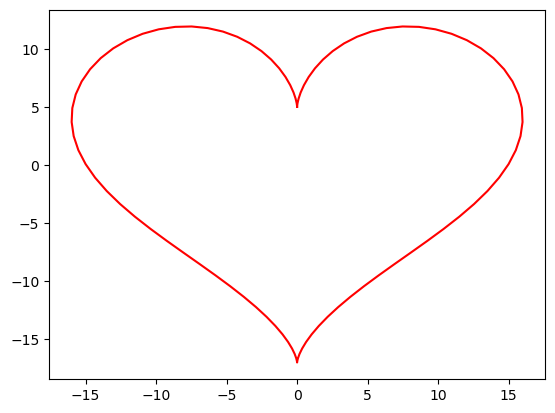

In [1]:
import numpy as np
from matplotlib import pyplot as plt

theta = np.linspace(0, 2 * np.pi, 100)

x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5* np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)

plt.plot(x, y, c='r');